Goal: basic dataset understanding – shapes, distributions, lengths, etc.

In [1]:
%load_ext autoreload
%autoreload 2

Cell 1 – imports and config path

In [2]:
import sys
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import yaml

# Make sure project root is on sys.path
PROJECT_ROOT = Path().resolve().parents[0]
if str(PROJECT_ROOT) not in sys.path:
    sys.path.append(str(PROJECT_ROOT))

from src.data.load import load_all_sources, add_broad_category, load_category_mapping

CONFIG_PATH = PROJECT_ROOT / 'configs' / 'base.yaml'

Cell 2 – load config and data

In [17]:
with CONFIG_PATH.open('r', encoding='utf-8') as f:
    cfg = yaml.safe_load(f)

df = load_all_sources(cfg, root=PROJECT_ROOT)
df = add_broad_category(df, cfg, root=PROJECT_ROOT)

valid_sources = {
    'Daily Times',
    'Pakistan Today',
    'Tribune',
    'Dawn',
    'Business Recorder',
}

print(df.shape)
df.head()


INFO:src.data.load:Loading source pakistan_today from /home/spark/NUST/Semester 5/Data Mining/Project/data/raw/pakistan_today(full-data).csv (encoding=utf-8)
INFO:src.data.load:Loading source tribune from /home/spark/NUST/Semester 5/Data Mining/Project/data/raw/tribune(full-data).csv (encoding=latin1)
INFO:src.data.load:Loading source dawn from /home/spark/NUST/Semester 5/Data Mining/Project/data/raw/dawn (full-data).csv (encoding=latin1)
INFO:src.data.load:Loading source daily_times from /home/spark/NUST/Semester 5/Data Mining/Project/data/raw/daily_times(full-data).csv (encoding=utf-8)
INFO:src.data.load:Loading preprocessed business_reorder from /home/spark/NUST/Semester 5/Data Mining/Project/data/interim/business_reorder_clean.parquet
INFO:src.data.load:Filtered invalid sources: (625905, 7) -> (624642, 7)
INFO:src.data.load:Combined dataset shape: (624642, 7)
INFO:src.data.load:Sampling up to 10000 rows per source (__file__ column).
/home/spark/NUST/Semester 5/Data Mining/Project/s

(40000, 8)


,headline,date,link,source,categories,description,__file__,broad_category
235575,Virus hits entire Venezuelan family in Peru,7/1/2020 1:20,https://dailytimes.com.pk/634132/virus-hits-en...,Daily Times,World,The 14 members of the Hernandez family arrived...,daily_times,World
311984,EVMs being opposed to manipulate polls: Imran,2/17/2022 6:07,https://dailytimes.com.pk/886980/evms-being-op...,Daily Times,Pakistan,Prime Minister Imran Khan Wednesday said manip...,daily_times,Pakistan
257006,Secretary Livestock wants timely delivery of v...,12/25/2020 8:12,https://dailytimes.com.pk/705715/secretary-liv...,Daily Times,Pakistan,Secretary Livestock Capt (R) Saqib Zafar chair...,daily_times,Pakistan
299841,SC upholds disqualification of PML-N MPA,11/24/2021 7:39,https://dailytimes.com.pk/845226/sc-upholds-di...,Daily Times,Pakistan & Top Stories,The Supreme Court Tuesday maintained the Islam...,daily_times,Pakistan
230900,"South Africa government, private hospitals agr...",6/8/2020,https://dailytimes.com.pk/623474/south-africa-...,Daily Times,World,The South African government has agreed how mu...,daily_times,World


Cell 3 – quick info & missing values

In [12]:
df.info()

df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
Index: 40000 entries, 235575 to 90616
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   headline        39999 non-null  object
 1   date            40000 non-null  object
 2   link            40000 non-null  object
 3   source          40000 non-null  object
 4   categories      40000 non-null  object
 5   description     39933 non-null  object
 6   __file__        40000 non-null  object
 7   broad_category  40000 non-null  object
dtypes: object(8)
memory usage: 2.7+ MB


headline           1
date               0
link               0
source             0
categories         0
description       67
__file__           0
broad_category     0
dtype: int64

Cell 4 – distribution of `source` and `broad_category`

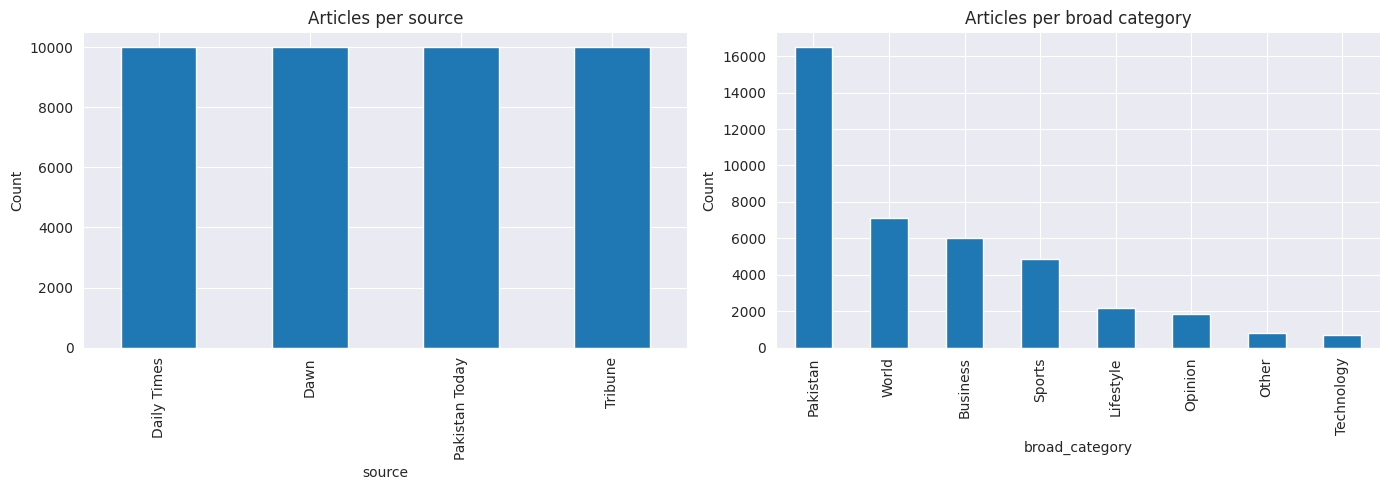

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

df['source'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Articles per source')
axes[0].set_ylabel('Count')

df['broad_category'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Articles per broad category')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


Cell 5 – (source, broad_category) heatmap

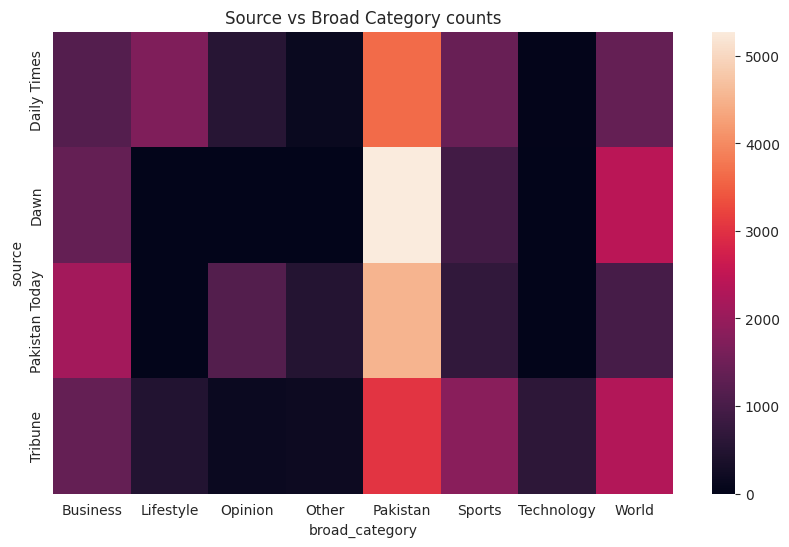

In [14]:
pivot = df.pivot_table(
    index='source',
    columns='broad_category',
    values='headline',
    aggfunc='count',
    fill_value=0,
)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=False, fmt='d')
plt.title('Source vs Broad Category counts')
plt.show()


Cell 6 – text length distributions

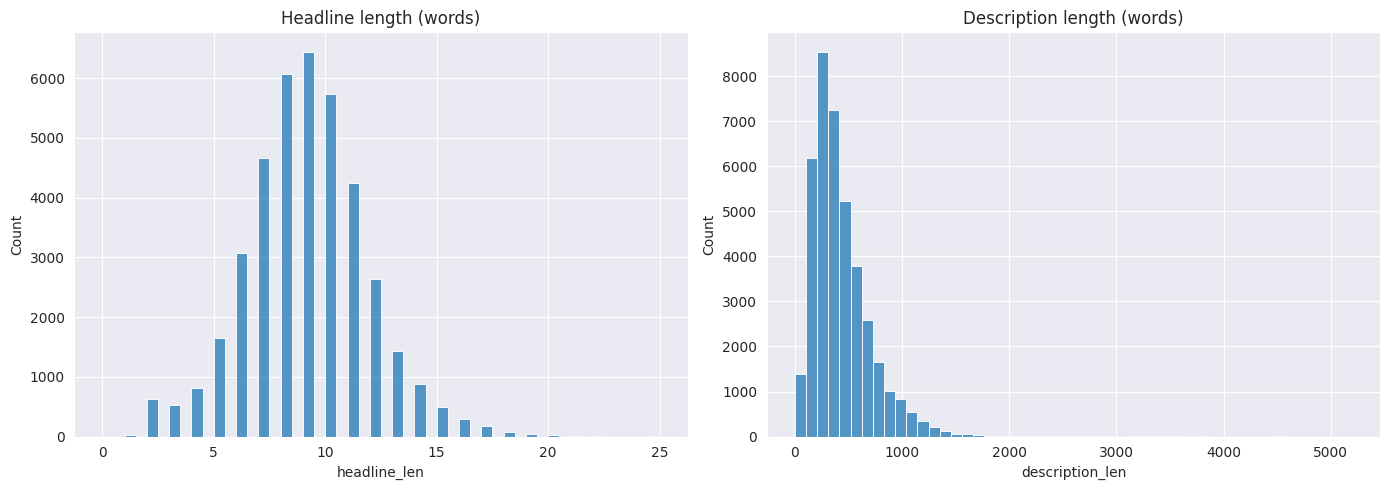

In [15]:
df['headline_len'] = df['headline'].fillna('').str.split().str.len()
df['description_len'] = df['description'].fillna('').str.split().str.len()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df['headline_len'], bins=50, ax=axes[0])
axes[0].set_title('Headline length (words)')

sns.histplot(df['description_len'], bins=50, ax=axes[1])
axes[1].set_title('Description length (words)')

plt.tight_layout()
plt.show()


Cell 7 – sample few rows per category

In [16]:
df.groupby('broad_category').head(2)[
    ['headline', 'broad_category', 'source', 'categories', 'description']
]


,headline,broad_category,source,categories,description
235575,Virus hits entire Venezuelan family in Peru,World,Daily Times,World,The 14 members of the Hernandez family arrived...
311984,EVMs being opposed to manipulate polls: Imran,Pakistan,Daily Times,Pakistan,Prime Minister Imran Khan Wednesday said manip...
257006,Secretary Livestock wants timely delivery of v...,Pakistan,Daily Times,Pakistan,Secretary Livestock Capt (R) Saqib Zafar chair...
230900,"South Africa government, private hospitals agr...",World,Daily Times,World,The South African government has agreed how mu...
299953,"Gold Rate In Pakistan Today, 25th November 2021",Business,Daily Times,Business,Gold Rate in Pakistan today on 25 November 202...
332163,"Kyrgios, Halep storm into Wimbledon quarterfinals",Sports,Daily Times,Sports,Romania’s Simona Halep returns the ball to Spa...
289948,PCB names 13 Balochistan CCA U19 squads for 50...,Sports,Daily Times,Sports,LAHORE: Pakistan Cricket Board on Monday anno...
360129,Javed Akhtar compares state of poverty in Paki...,Lifestyle,Daily Times,Lifestyle,Javed Akhtar has compared the poverty of India...
286733,Fires Across the Continents: Global Warming on...,Opinion,Daily Times,Op-Ed,It is time to wake up. We are facing the bigge...
243697,Ridley Scott’s ‘Raised By Wolves’ Is a Grim Bo...,Lifestyle,Daily Times,Reviews,Creating a post-apocalyptic story that feels g...
